<a href="https://colab.research.google.com/github/showblue/ai-agent-foundation-labs/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train MSE: 50.63, R²: 0.91
Test MSE: 93.84, R²: 0.76

Sample predictions: [35.58 67.36 68.13 95.08 30.4 ]
Actual values:      [39.32 51.03 68.16 90.79 29.42]


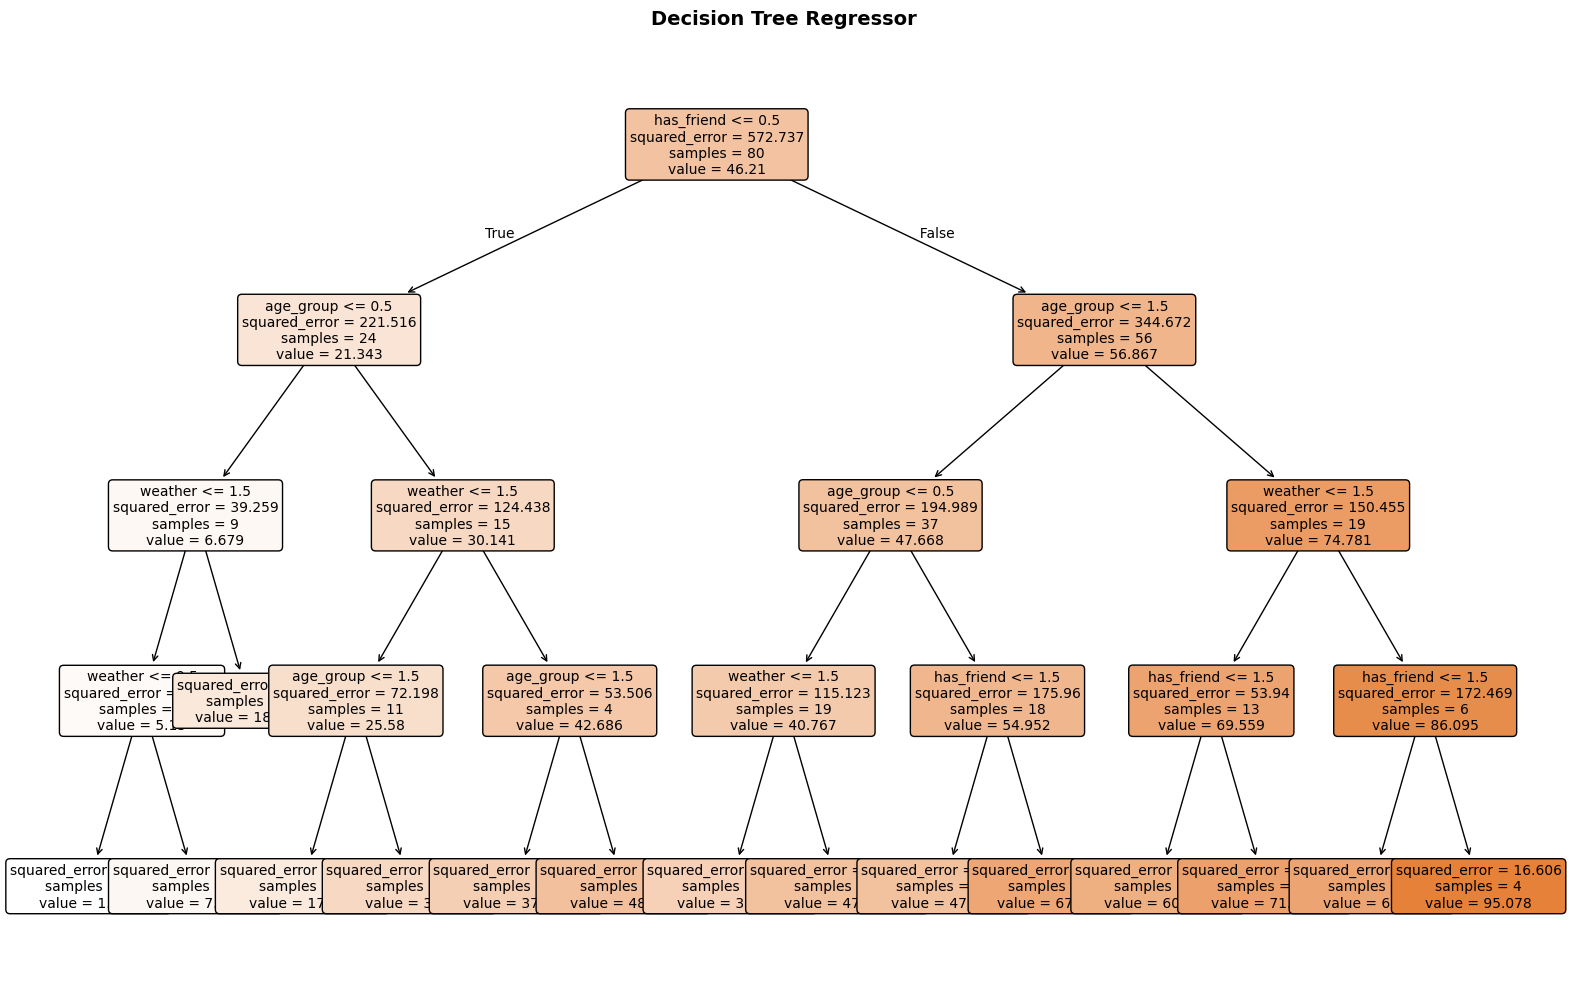

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Fake dataset: Predict a continuous value (e.g., sports performance score)
# Features: age_group (0, 1, 2), weather (0, 1, 2), has_friend (0, 1)
# Target: performance_score (continuous value 0-100)

np.random.seed(42)
n_samples = 100

X = np.random.randint(0, 3, (n_samples, 3))
# Generate target with some pattern + noise
y = (X[:, 0] * 15 + X[:, 1] * 10 + X[:, 2] * 20 + np.random.normal(0, 5, n_samples))
y = np.clip(y, 0, 100)  # Keep scores between 0-100

# Split train-test
split = int(0.8 * n_samples)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train regressor
dt = DecisionTreeRegressor(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Evaluate
train_mse = ((dt.predict(X_train) - y_train) ** 2).mean()
test_mse = ((dt.predict(X_test) - y_test) ** 2).mean()
train_r2 = dt.score(X_train, y_train)
test_r2 = dt.score(X_test, y_test)

print(f"Train MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")
print(f"\nSample predictions: {dt.predict(X_test[:5]).round(2)}")
print(f"Actual values:      {y_test[:5].round(2)}")

# Visualize the tree
fig, ax = plt.subplots(figsize=(16, 10))
plot_tree(dt,
          feature_names=['age_group', 'weather', 'has_friend'],
          filled=True,
          rounded=True,
          ax=ax,
          fontsize=10)
plt.title('Decision Tree Regressor', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()